In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001130144"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001130144
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,SIERRA BANCORP
Ticker,BSRR


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,52.0,1.132519e+01,2.813403e+00,5.93,9.435,11.67,12.6,18.53
interest income,59.0,8.342295e+06,8.621319e+06,12417.00,17896.000,10324000.00,14724000.0,27483000.00
net income,59.0,2.015376e+06,2.290000e+06,-1883.00,4139.500,1635000.00,3799000.0,8895000.00
net interest income,59.0,7.704138e+06,7.943776e+06,10315.00,13999.000,8601000.00,13522000.0,24058000.00
provision for loan losses,3.0,3.752577e+05,3.627469e+05,773.00,200386.500,400000.00,562500.0,725000.00


# Plots

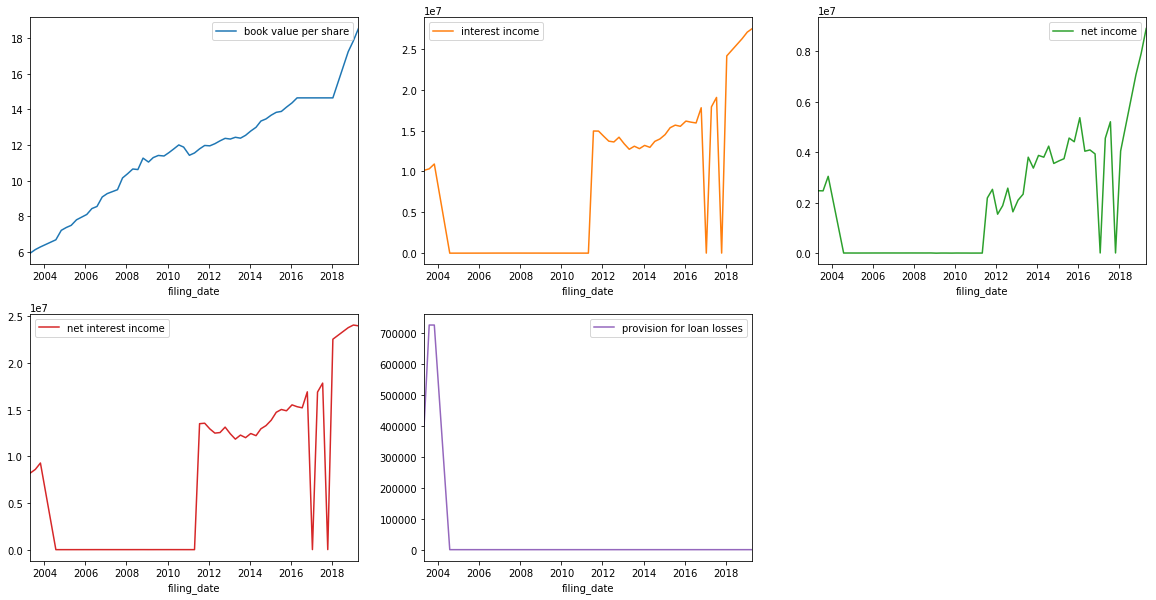

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001130144 book value per share        2003Q4 to 2004Q1: 2 periods  missing   
           book value per share                             2005Q3  missing   
           book value per share                             2007Q2  missing   
           book value per share        2016Q2 to 2018Q2: 9 periods  missing   
           interest income             2003Q4 to 2004Q1: 2 periods  missing   
           interest income                                  2005Q3  missing   
           interest income                                  2007Q2  missing   
           interest income             2018Q1 to 2018Q2: 2 periods  missing   
           net income                  2003Q4 to 2004Q1: 2 periods  missing   
           net income                                       2005Q3  missing   
           net income                                       2007Q2  missing   
           net income                  2018Q1 to 2018Q2: 2 periods  missing   
           net interest income         2003Q4 to 2004Q1: 2 periods  missing   
           net interest income                              2005Q3  missing   
           net interest income                              2007Q2  missing   
           net interest income         2018Q1 to 2018Q2: 2 periods  missing   
           provision for loan losses   2003Q3 to 2004Q1: 3 periods  missing   
           provision for loan losses  2004Q3 to 2019Q1: 59 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001130144 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()